# Imagenes Satelitales y ML supervisado

Diferentes satélites como LANDSAT, SPOT, u otros miden la energía reflejada por la superficie terrestre a diferentes longitudes de onda. Cada longitud de onda y el entorno define una franja o "banda" de interpes en el espectro electromagnético. De esta forma se obtienen las imagenes multiespectrales, donde cada imagen se forma a partir de los datos escaneados en una determinada banda.


[Leer](https://drive.google.com/file/d/1uOuZE5N6UNIPI9Yhd_c7pnXydT6UojcU/view?usp=sharing)


In [ ]:
#instalar lo necesario
# vamos a usar datos raster
!pip install rasterio

Un ráster consta de una matriz de celdas (o píxeles) organizadas en filas y columnas (o una cuadrícula) en la que cada celda contiene un valor que representa información. Los rásteres son fotografías aéreas digitales, imágenes de satélite, imágenes digitales o incluso mapas escaneados.

RASTER: Cualquier tipo de imagen digital representada en mallas (Pixels). Divide el espacio en celdas regulares donde cada una de ellas representa un único valor.



La malla define el espacio geográfico como una matriz de puntos de cuadrícula cuadrados de igual tamaño dispuestos en filas y columnas. Cada punto de la cuadrícula almacena un valor numérico que representa un atributo geográfico (tales como elevación o superficie de la pendiente) para esa unidad de espacio. Cada celda de la malla se referencia por sus coordenadas x e y.




![raster](https://desktop.arcgis.com/es/arcmap/latest/manage-data/raster-and-images/GUID-6754AF39-CDE9-4F9D-8C3A-D59D93059BDD-web.png)

¿Cómo trabaja Raterio?

 Es una biblioteca popular en Python para la lectura y escritura de datos geoespaciales raster. Estos datos son básicamente imágenes que tienen información geográfica asociada con ellos, como mapas satelitales o modelos de elevación digital.


 rasterio se basa en la biblioteca GDAL, lo que significa que puede leer y escribir una gran variedad de formatos geoespaciales. Sin embargo, a diferencia de trabajar directamente con GDAL, rasterio ofrece una interfaz más "pythonica", lo que facilita su uso.

 ## Ej de como podemos abrir un archivo

 Utilizando la función open, que devuelve un objeto Dataset. Con este objeto, puedes leer bandas individuales del raster, obtener metadatos, transformaciones, entre otras operaciones.

 ```
 import rasterio

with rasterio.open('path_to_file.tif') as src:
    band1 = src.read(1)
```


In [ ]:
import numpy as np
import rasterio
from rasterio.plot import show

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier


import matplotlib.colors as mcolors
import matplotlib.pyplot as plt


Usaremos muestras de entrenamiento que sería una sub-imagenes satelitales y que deben estar organizadas. Esto lo haremos con numpy y las ordenaremos en listas.

dos liestas
pixeles : almacenemos los pixeles que representan una cobertura especifica
etiquetas: almacenamos las etiquetas o categoria: agua, lago, suelo, desierto, etc.


In [ ]:
pixeles = []
etiquetas = []

Vamos a usar muestras de entrenamiento ya listas que encontré en internet.

Estas muestras de entrenamiento van a tener 3 coberturas c/u con 7 imagenes multiespectrales de 7 bandas.

In [ ]:
directorio_coberturas = r"/content/drive/MyDrive/Talle_IA/imgSat/Entrenamiento"

In [ ]:
%cd /content/drive/MyDrive/Talle_IA/imgSat/Entrenamiento

/content/drive/MyDrive/Talle_IA/imgSat/Entrenamiento


In [ ]:
%ls

Cobertura_1/  Cobertura_2/  Cobertura_3/


In [ ]:
%ls  Cobertura_1

muestra1.tif  muestra2.tif  muestra3.tif  muestra4.tif  muestra5.tif  muestra6.tif  muestra7.tif


In [ ]:
# Tenemos que recorrer cada carpeta para ir recorriendo cada
# archivo dentro de la carpeta

for cobertura in range(1, 4):  # Son 3 carpetas
    carpeta = directorio_coberturas + '/Cobertura_' + str(cobertura)
    for muestra in range(1, 8): # del 1 al 7
        archivo = carpeta + '/muestra' + str(muestra) + '.tif'
        #print (archivo)
        #Aqui abrimos cada imagen
        with rasterio.open(archivo) as muestra_entrenamiento:
            #leemos la imagen
            imagen = muestra_entrenamiento.read()
            # Aqui imprimimos las 7 bandas
            #print (imagen)
            # No queremos una imagen con 3D ancho x largo x numero de banda
            # Debemos aplanar las bandas para pasar de 3D a lista para que
            #tengamos información de los pixeles

            #Aqui modificamos la forma. Extraer solo la primera
            # dimension de la imagen y vamos a transponerla
            imagen = imagen.reshape((imagen.shape[0], -1)).T
            #print(imagen)

            #Vamos a agregar estos pixeles a la lista vacia
            pixeles.extend(imagen)
            # Vamos a agregar la etiqueta 1, 2 o 3
            etiquetas.extend([cobertura] * imagen.shape[0])

Vamos las listas

In [ ]:
print(pixeles)

[array([ 7887,  9701, 14749, 15326, 18232, 20539, 20171], dtype=uint16), array([ 8675, 11368, 16862, 16768, 19167, 20705, 22375], dtype=uint16), array([ 9289, 13924, 17357, 17168, 19135, 19473, 19459], dtype=uint16), array([13801, 16628, 18538, 18863, 20466, 21308, 20828], dtype=uint16), array([15196, 20132, 21075, 23226, 23600, 24484, 23790], dtype=uint16), array([11834, 15314, 16813, 19684, 21919, 22709, 21062], dtype=uint16), array([    0,  1822,  5344,  8441, 18467, 15754, 14104], dtype=uint16), array([10850, 13781, 15605, 17965, 18966, 21316, 22057], dtype=uint16), array([10539, 11743, 14613, 17523, 16949, 20743, 19851], dtype=uint16), array([13132, 13193, 17057, 19267, 18103, 21775, 19877], dtype=uint16), array([16498, 17294, 20748, 20178, 20268, 23601, 20882], dtype=uint16), array([ 9923, 10727, 18576, 16295, 18798, 21004, 19688], dtype=uint16), array([12180, 15038, 19228, 18850, 21236, 23404, 22266], dtype=uint16), array([11376, 15001, 18596, 18459, 22433, 22349, 21424], dtype=

In [ ]:
print(etiquetas)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Las convertimos en array de numpy

In [ ]:
pixeles = np.array(pixeles)
etiquetas = np.array(etiquetas)



In [ ]:
print(pixeles)

[[ 7887  9701 14749 ... 18232 20539 20171]
 [ 8675 11368 16862 ... 19167 20705 22375]
 [ 9289 13924 17357 ... 19135 19473 19459]
 ...
 [ 7621  7828  8630 ...  7850  7476  7401]
 [ 7621  7828  8630 ...  7850  7476  7401]
 [ 7590  7817  8627 ...  7823  7484  7404]]


In [ ]:
print(etiquetas)

[1 1 1 ... 3 3 3]


# Dividir la data

La dividimos con
```
train_test_split(pixeles, etiquetas, 0,20)
```

y esto lo guardamos en variables

In [ ]:
pixeles_entrenamiento, pixeles_test, etiquetas_entrenamiento, etiquetas_test = train_test_split(pixeles, etiquetas, test_size = 0.20)

Vamos a normalizar los datos todos los valores deben estar en el mismo intervalo para no tener datos tan extremos y tener una escala comun

In [ ]:
scaler = StandardScaler()

Lo vamos a ajustar con scaler.fit los pixeles de entrenamiento y testeo.

Por qué escalar: Muchos algoritmos de aprendizaje automático no funcionan bien si las características (también llamadas variables o entradas) tienen diferentes escalas. Por ejemplo, los algoritmos basados en distancias (como KNN o K-means) o algoritmos de optimización basados en gradiente (como el descenso del gradiente utilizado en redes neuronales o regresión logística) pueden converger más lentamente, o no converger en absoluto, si las características no están en la misma escala.

In [ ]:
scaler.fit(pixeles_entrenamiento)
pixeles_entrenamiento = scaler.transform(pixeles_entrenamiento)
pixeles_test = scaler.transform(pixeles_test)

In [ ]:
# usamos KNN con 5 vecinos mas cercanos.
knn = KNeighborsClassifier(n_neighbors = 5)

#Ajustamos los pixeles y etiquetas de entrenamiento
knn.fit(pixeles_entrenamiento, etiquetas_entrenamiento)



KNeighborsClassifier()

Vamos a tomar una imagen para clasificarla

In [ ]:
directorio_imagen_satelital = "/content/drive/MyDrive/Talle_IA/imgSat/LC09_L2SP_008057_20230203_20230311_02_T1_MTL.tif"

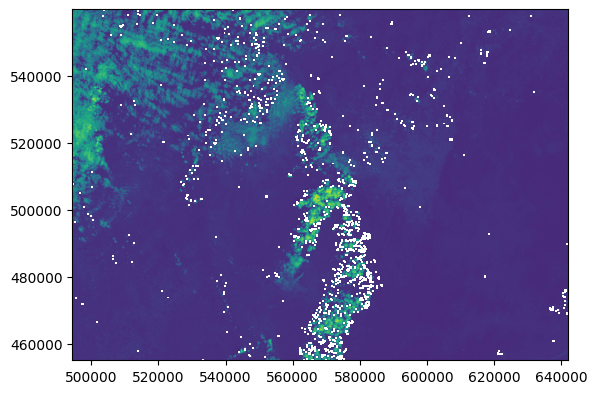

<Axes: >

In [ ]:
# La visualizamos

imagen_satelital = rasterio.open(directorio_imagen_satelital)
show(imagen_satelital)

In [ ]:
#hay que extraer los metadatos de la imagen o preperarla
# tranformandola

with rasterio.open(directorio_imagen_satelital) as imagen_satelital:
    imagen_a_clasificar = imagen_satelital.read()
    #extraer los metadatos
    metadata_original = imagen_satelital.profile



In [ ]:
metadata_original

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 4926, 'height': 3484, 'count': 7, 'crs': CRS.from_epsg(32618), 'transform': Affine(29.994578831302498, 0.0, 494356.5212026284,
       0.0, -29.993794718714135, 559730.7462181349), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}

In [ ]:
#reshape
imagen_a_clasificar = imagen_a_clasificar.reshape((imagen_a_clasificar.shape[0], -1)).T
#scaler
imagen_a_clasificar = scaler.transform(imagen_a_clasificar)



In [ ]:
imagen_a_clasificar

array([[ 6.76626586,  5.81729761,  4.39425743, ...,  3.73535712,
         1.6092731 ,  1.2647858 ],
       [ 6.86439944,  5.82672836,  4.54207013, ...,  3.83390054,
         1.64672025,  1.30470936],
       [ 6.74991027,  5.6501457 ,  4.55228368, ...,  3.81215303,
         1.67946552,  1.32917316],
       ...,
       [-0.44655175, -0.58357995, -0.61775647, ...,  0.73646555,
        -0.47920334, -0.81531674],
       [-0.46142047, -0.5936611 , -0.67534952, ...,  0.82821287,
        -0.54015992, -0.85082322],
       [-0.44283457, -0.58325476, -0.58059051, ...,  1.1582767 ,
        -0.33310907, -0.76604936]])

# Predicción

se va a demorar como 13 minutos

In [ ]:
imagen_clasificada_knn = knn.predict(imagen_a_clasificar)

La imagen esta trasnformada por lo que vamos a hacer reshape y luego la vamos a guardar.
y luego hay que usar ipdate para actualizar la imagen

In [ ]:
#Consideramos el alto y el ancho del original
imagen_clasificada_knn = imagen_clasificada_knn.reshape((metadata_original['height'], metadata_original['width']))

In [ ]:
# esto es para que la imagen de salida tenga solo una banda
metadata_original.update(count = 1, dtype = rasterio.int32)

In [ ]:
directorio_imagen_satelital_clasificada = '/content/drive/MyDrive/Talle_IA/imgSat/imagen_clasificada_knn.tif'

In [ ]:


with rasterio.open(directorio_imagen_satelital_clasificada, 'w', **metadata_original) as imagen_satelital:
    imagen_satelital.write(imagen_clasificada_knn.astype(rasterio.int32), 1)



In [ ]:
%ls /content/drive/MyDrive/Talle_IA/imgSat/

Entrenamiento/
imagen_clasificada_knn.tif
LC09_L2SP_008057_20230203_20230311_02_T1_MTL.tfw
LC09_L2SP_008057_20230203_20230311_02_T1_MTL.tif
LC09_L2SP_008057_20230203_20230311_02_T1_MTL.tif.aux.xml
LC09_L2SP_008057_20230203_20230311_02_T1_MTL.tif.ovr
LC09_L2SP_008057_20230203_20230311_02_T1_MTL.tif.xml


Vamos a visualizarla

In [ ]:
# abrimos el directorio y una vez abierta la imagen la leemos con read
with rasterio.open(directorio_imagen_satelital_clasificada) as imagen_clasificada_knn:
    # Solo lee una banda
    imagen_knn = imagen_clasificada_knn.read(1)


In [ ]:
imagen_knn

array([[1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [1, 1, 2, ..., 2, 1, 1],
       [1, 1, 1, ..., 2, 1, 2],
       [1, 1, 1, ..., 2, 2, 1]], dtype=int32)

PAra visuzizarla podemos debemos colocar los colores y asi cada numero tenga un color diferente



In [ ]:
colores = ['green', 'brown', 'blue']
rampa_de_colores = mcolors.ListedColormap(colores)

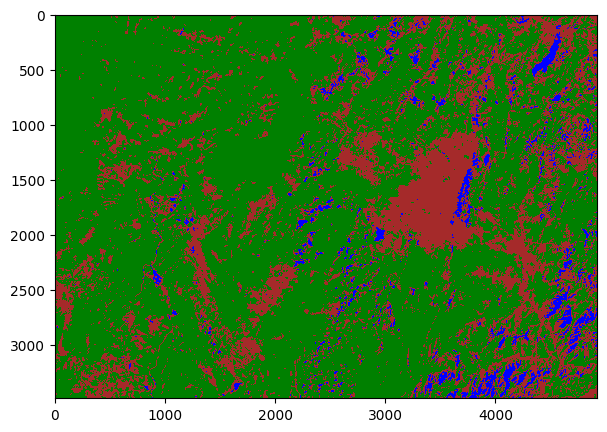

In [ ]:
# Con esto la visualizamos
fig, ax = plt.subplots(figsize = (7, 7))
img = ax.imshow(imagen_knn, cmap = rampa_de_colores)
